In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
im.shape

(1262, 702, 3)

In [24]:
im = cv2.imread('board.png')
im = cv2.resize(im, (im.shape[1] // 4, im.shape[0] // 4))

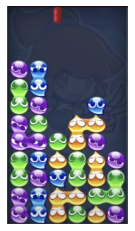

In [25]:
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

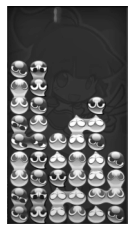

In [26]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.show()

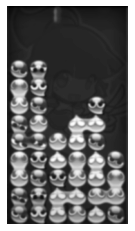

In [30]:
im_blur = cv2.GaussianBlur(im_gray, (9, 9), 1)
plt.imshow(im_blur, cmap='gray')
plt.axis('off')
plt.show()

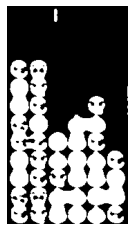

In [39]:
# This is sensitive to the lighting of the input images...
mask = np.ones(im_blur.shape, dtype=np.float)
mask[(im_blur / 255) < 0.3] = 0
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

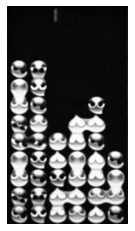

In [42]:
# Apply contrast stretching to im_blur to improve the chances of segmenting out the char background
# https://stackoverflow.com/questions/42257173/contrast-stretching-in-python-opencv
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
im_contrast = cv2.LUT(im_blur, table)
plt.imshow(im_contrast, cmap='gray')
plt.axis('off')
plt.show()

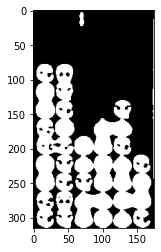

In [45]:
mask = np.zeros(im_contrast.shape, dtype=np.float)
mask[(im_contrast / 255) > 0.1] = 1.0
plt.imshow(mask, cmap='gray')
plt.show()

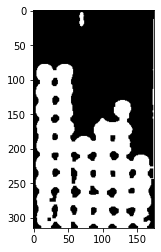

In [67]:
# Binary closing
kernel = np.ones((5,5),np.uint8)
mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask_closed = cv2.morphologyEx(mask_closed, cv2.MORPH_CLOSE, kernel)
mask_closed = cv2.morphologyEx(mask_closed, cv2.MORPH_CLOSE, kernel)
plt.imshow(mask_closed, cmap='gray')
plt.show()

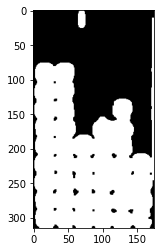

In [75]:
# Erode the reverse mask?
mask_reverse = 1 - mask
kernel = np.ones((3,3),np.uint8)
mask_reverse = cv2.morphologyEx(mask_reverse, cv2.MORPH_ERODE, kernel)
mask_reverse = cv2.morphologyEx(mask_reverse, cv2.MORPH_ERODE, kernel)
mask_reverse = 1 - mask_reverse
full_mask = cv2.morphologyEx(mask_reverse, cv2.MORPH_CLOSE, kernel)
plt.imshow(full_mask, cmap='gray')
plt.show()

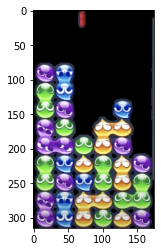

In [81]:
im_masked = np.zeros(im.shape, dtype=np.uint8)
im_masked[:] = im
im_masked[full_mask == 0] = 0
plt.imshow(cv2.cvtColor(im_masked, cv2.COLOR_BGR2RGB))